In [7]:
# config to get better plot
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib
matplotlib.rcParams['savefig.dpi'] = 1.5 * matplotlib.rcParams['savefig.dpi'] # larger image
matplotlib.rcParams['axes.labelcolor'] =  'green' # default green for label

matplotlib.rcParams['axes.linewidth'] =  0.5

from matplotlib import pyplot as plt
import seaborn as sb # add seaborn for pretty plot (vs default one in matplotlib)

import warnings # just to avoid any warning to make this notebook prettier
warnings.filterwarnings('ignore')

In [3]:
# import pytraj
import pytraj as pt

# load sample data
traj = pt.datafiles.load_tz2()
traj

pytraj.TrajectoryIterator, 101 frames: 
Size: 0.000503 (GB)
<Topology: 223 atoms, 13 residues, 1 mols, non-PBC>
           

In [4]:
# find hbond
hb = pt.hbond(traj)
print('donor - acceptor: ', hb._amber_mask())

print("")
print(hb.data)

donor - acceptor:  [':1@OG :2@H', ':5@O :3@HG1', ':3@O :1@H3', ':6@O :8@H', ':3@OG1 :6@HD21', ':2@O :4@H', ':10@OG1 :8@HZ3', ':10@O :12@HZ1', ':10@O :10@HG1', ':10@OG1 :12@HZ1', ':10@O :12@HZ2', ':5@OE2 :6@H', ':7@O :9@H']

<pytraj.DatasetList with 14 datasets>
total_solute_hbonds
[0 1 0 ..., 0 0 0]

SER1_OG-TRP2_N-H
[0 1 0 ..., 0 0 0]

GLU5_O-THR3_OG1-HG1
[0 0 0 ..., 0 0 0]
...

GLU5_OE2-ASN6_N-H
[0 0 0 ..., 0 0 0]

GLY7_O-TRP9_N-H
[0 0 0 ..., 0 0 0]


In [5]:
dist = pt.distance(traj, hb._amber_mask())
print('all hbond distances: ', dist)

all hbond distances:  [[ 2.1924577   1.92054906  2.35839995 ...,  3.93999355  3.81974987
   4.45726496]
 [ 8.03544864  3.95953378  4.2438701  ...,  6.47548095  4.97960639
   6.47500662]
 [ 4.38455889  3.25022817  3.38755539 ...,  6.45264846  7.37518528
   6.0956301 ]
 ..., 
 [ 6.97851158  9.15141704  8.42936098 ...,  7.2329342   6.74667953
   5.96993506]
 [ 4.40668236  4.33245685  4.49102881 ...,  5.0485394   4.88464996
   6.04310722]
 [ 2.10765322  3.28954633  4.13369896 ...,  2.22195659  3.01349072
   3.48705884]]


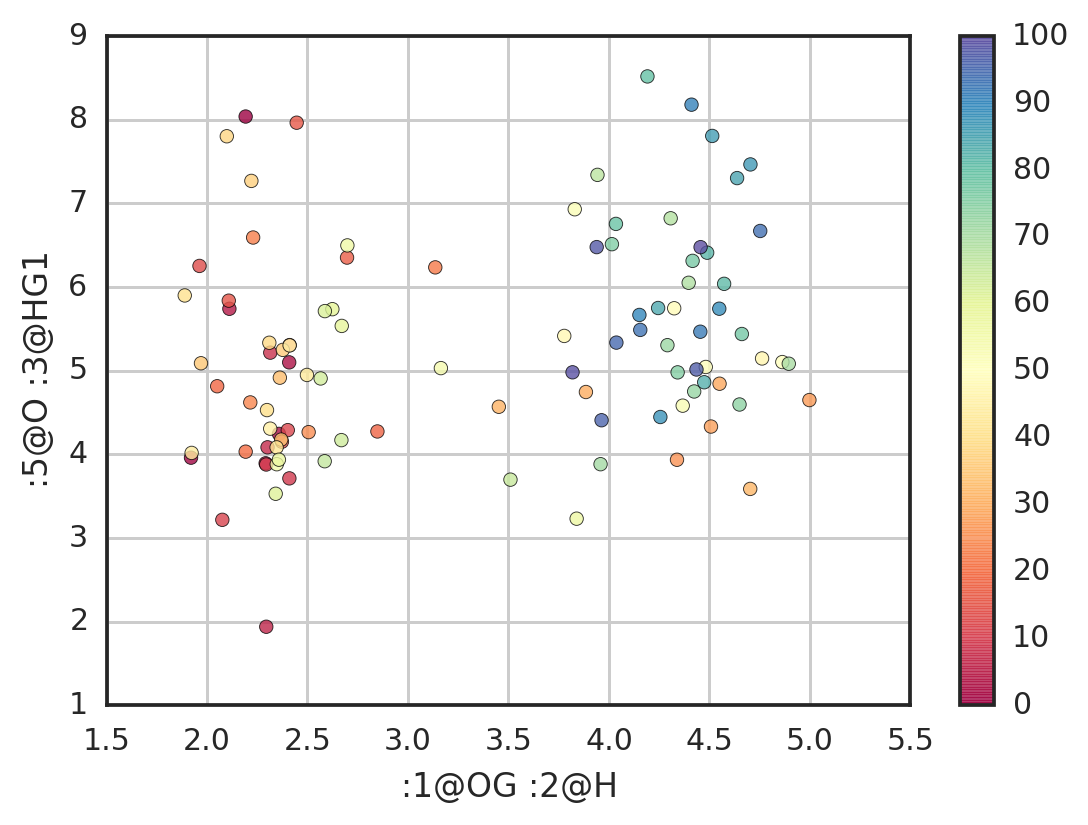

In [6]:
sb.color_palette('deep', n_colors=6, desat=0.5)
sb.set_style(style='white')

# scatter plot for distance between ':1@OG :2@H' and ':5@O :3@HG1'
# the point is colored by frame number (total frame = traj.n_frames (101))
fig = plt.scatter(dist[0], dist[1], marker='o', c=range(traj.n_frames), alpha=0.8, cmap='Spectral')
plt.colorbar()
plt.grid()
plt.xlabel(':1@OG :2@H')
plt.ylabel(':5@O :3@HG1')